In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# # Paths to the dataset files
# path_high_coach = "/content/sample_data/simulation-high-coach.csv"
# path_high_friend = "/content/sample_data/simulation-high-friend.csv"
# path_low_coach = "/content/sample_data/simulation-low-coach.csv"
# path_low_friend = "/content/sample_data/simulation-low-friend.csv"

# # path_low_coach = "/content/sample_data/simulation.csv"

# # Reading the datasets
# df_high_coach = pd.read_csv(path_high_coach)
# df_high_friend = pd.read_csv(path_high_friend)
# df_low_coach = pd.read_csv(path_low_coach)
# df_low_friend = pd.read_csv(path_low_friend)

# # Adding new columns for wellbeing status and counselor type
# df_high_coach['wellbeing'] = 'high'
# df_high_coach['counselor'] = 'coach'
# df_high_friend['wellbeing'] = 'high'
# df_high_friend['counselor'] = 'friend'
# df_low_coach['wellbeing'] = 'low'
# df_low_coach['counselor'] = 'coach'
# df_low_friend['wellbeing'] = 'low'
# df_low_friend['counselor'] = 'friend'

# # Combining all datasets into a single DataFrame
# combined_df = pd.concat([df_high_coach, df_high_friend, df_low_coach, df_low_friend], ignore_index=True)

# Path to the combined dataset
path_combined = "/content/sample_data/simulation.csv"

# Reading the dataset
df_combined = pd.read_csv(path_combined)

# Function to determine student well-being from prompts
def determine_student_wellbeing(prompt):
    # Checking if the prompt contains the specified positive life condition
    if "You are a student who feels generally positive about life. Recently, \
you've been managing your academic and personal responsibilities well" in prompt:
        return 'high'
    else:
        return 'low'

# Function to determine counselor type from prompts
def determine_counselor_type(prompt):
    # Checking if the prompt identifies the speaker as a coach
    if "You are a coach" in prompt:
        return 'coach'
    else:
        return 'friend'

# Apply the functions to create new columns
df_combined['student_wellbeing'] = df_combined['Student_Prompt'].apply(determine_student_wellbeing)
df_combined['counselor_type'] = df_combined['Counselor_Prompt'].apply(determine_counselor_type)

# Now you can filter as previously described
df_high_coach = df_combined[(df_combined['student_wellbeing'] == 'high') & (df_combined['counselor_type'] == 'coach')]
df_high_friend = df_combined[(df_combined['student_wellbeing'] == 'high') & (df_combined['counselor_type'] == 'friend')]
df_low_coach = df_combined[(df_combined['student_wellbeing'] == 'low') & (df_combined['counselor_type'] == 'coach')]
df_low_friend = df_combined[(df_combined['student_wellbeing'] == 'low') & (df_combined['counselor_type'] == 'friend')]

# Adding new columns for wellbeing status and counselor type
for df in [df_high_coach, df_high_friend, df_low_coach, df_low_friend]:
    df['wellbeing'] = df['student_wellbeing']
    df['counselor'] = df['counselor_type']

# Combining all datasets into a single DataFrame
combined_df = pd.concat([df_high_coach, df_high_friend, df_low_coach, df_low_friend], ignore_index=True)


<ipython-input-30-8bbbe2075cba>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wellbeing'] = df['student_wellbeing']
<ipython-input-30-8bbbe2075cba>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['counselor'] = df['counselor_type']
<ipython-input-30-8bbbe2075cba>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-31-c6242601b52c>:146: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=data_high, x='Stage', y='Mean', hue='counselor',
<ipython-input-31-c6242601b52c>:146: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data_high, x='Stage', y='Mean', hue='counselor',
<ipython-input-31-c6242601b52c>:156: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=data_low, x='Stage', y='Mean', hue='counselor',
<ipython-input-31-c6242601b52c>:156: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data_low, x='Stage', y='Mean', hue='counselor',
<ipython-input-31-c6242601b52c>:146: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effec

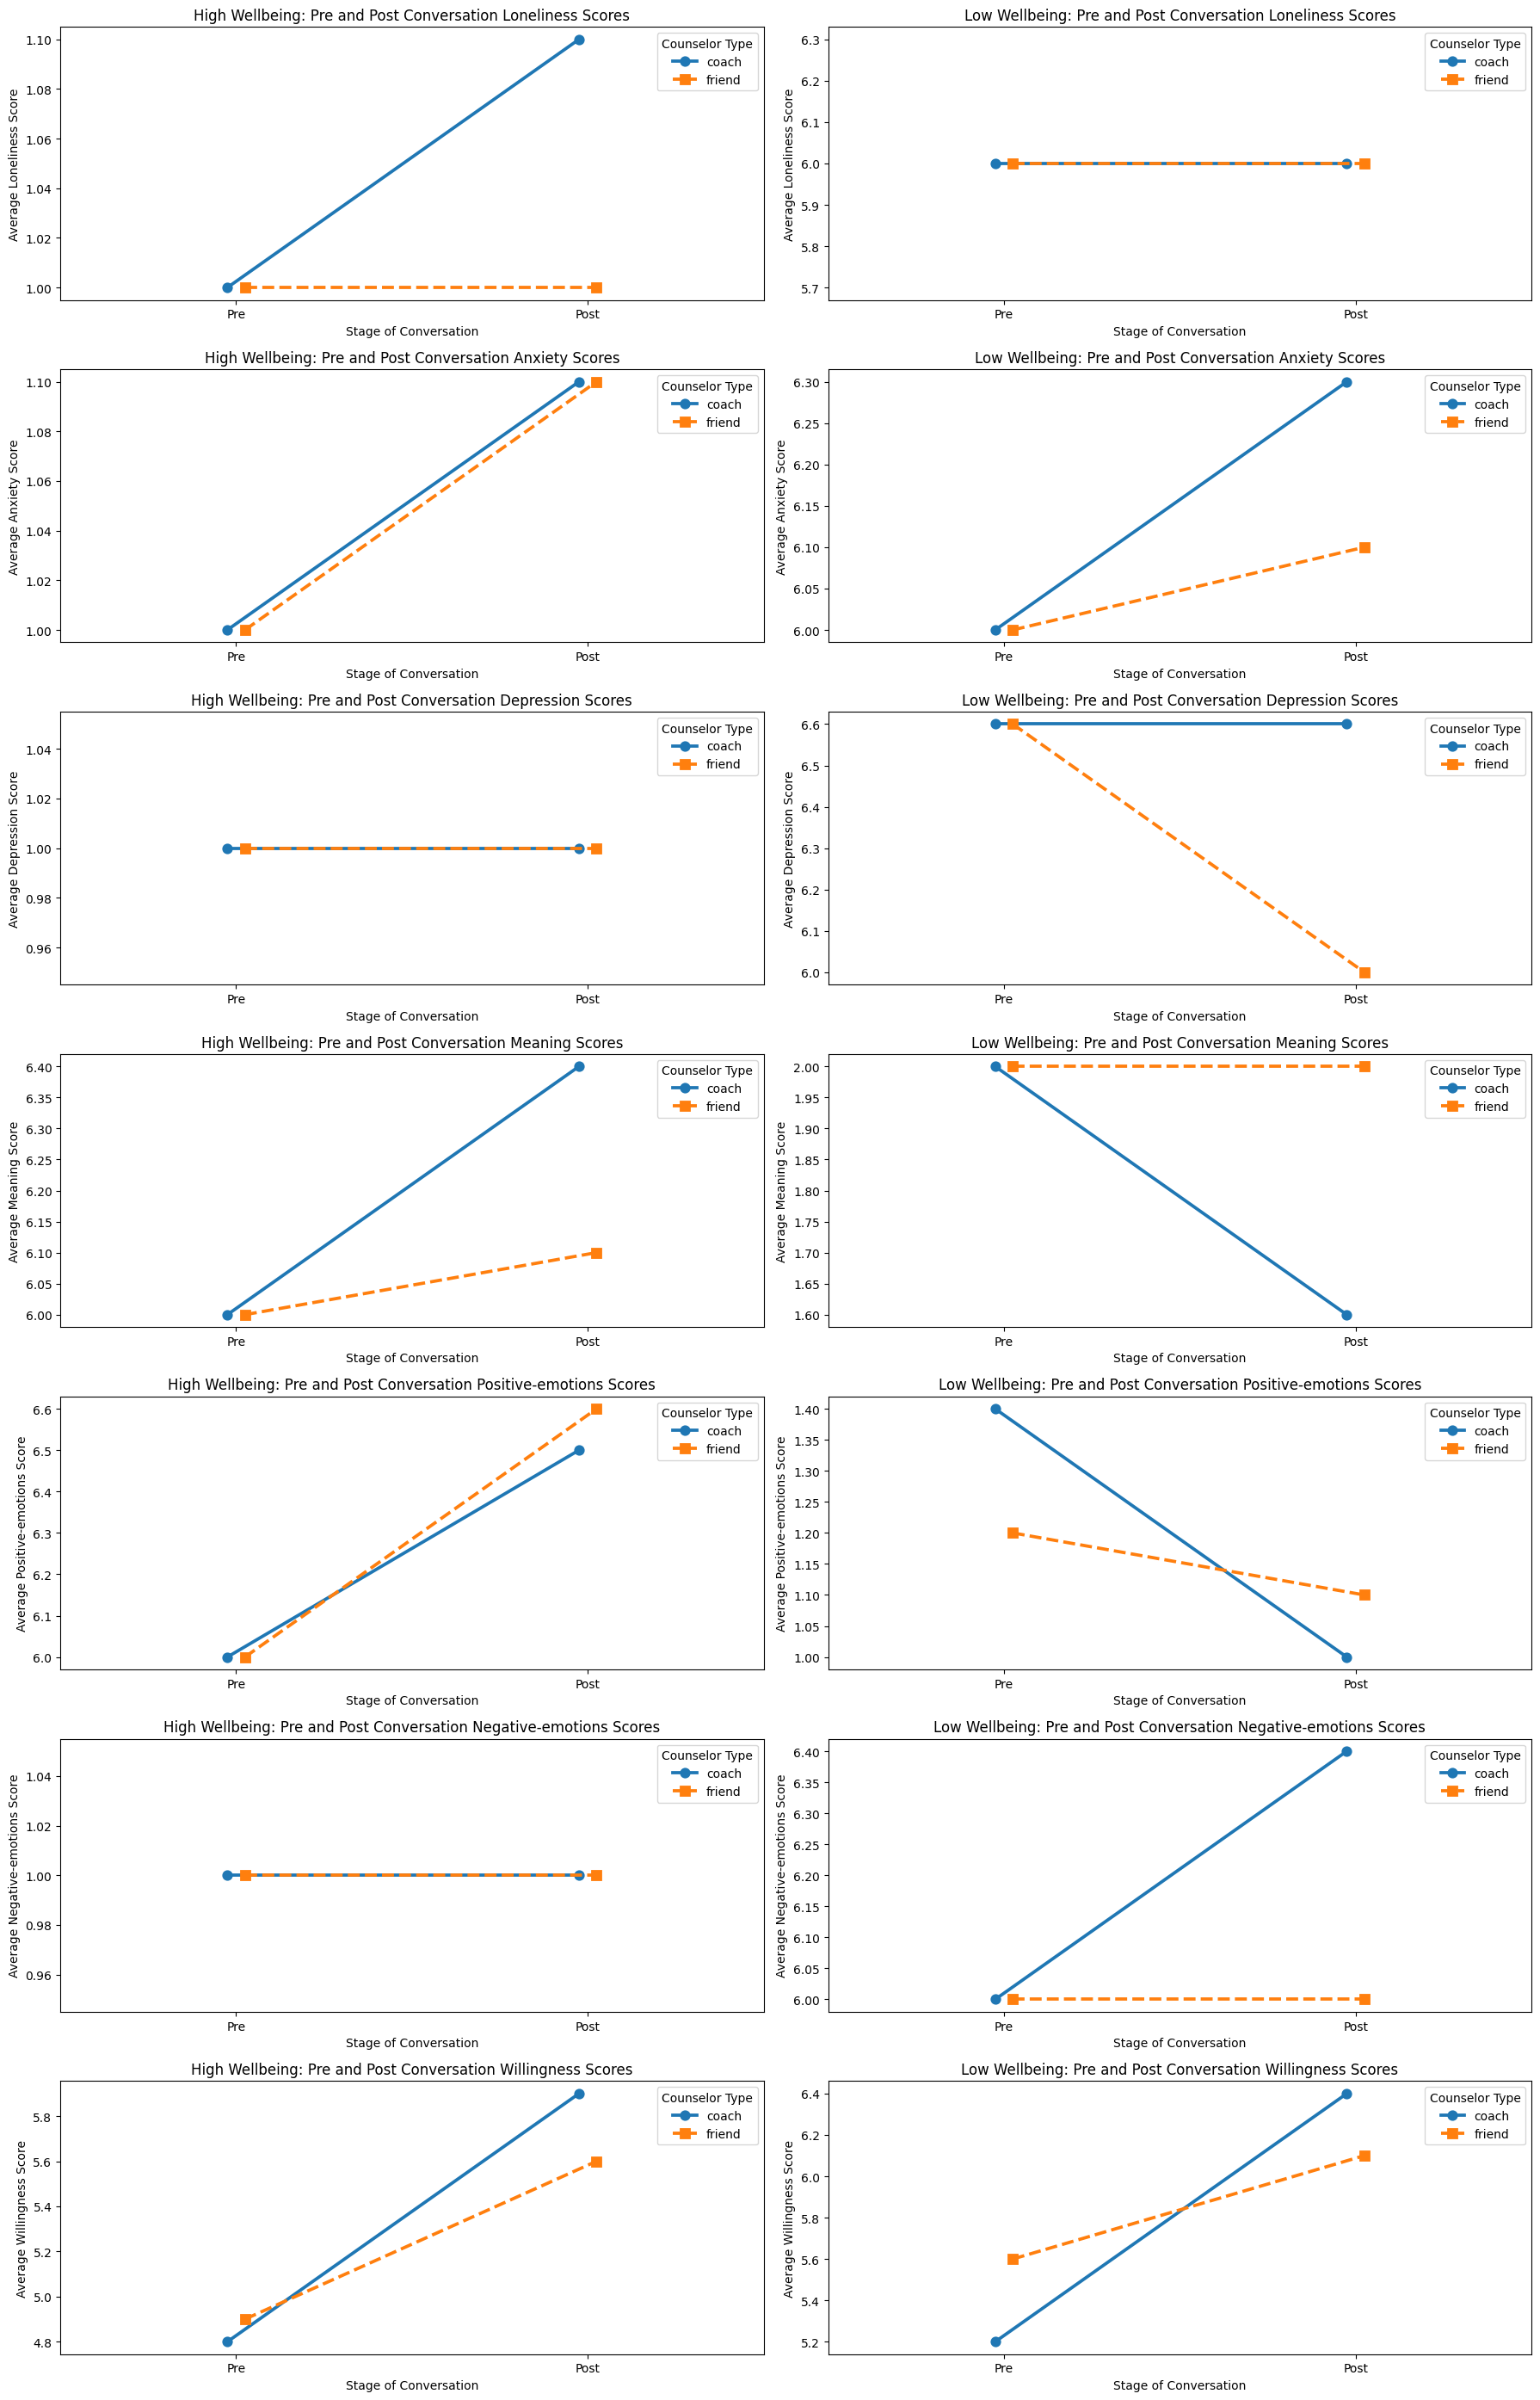

In [ ]:
# # Assuming combined_df is your DataFrame after concatenating all your datasets and adding 'wellbeing' and 'counselor'
# # Grouping data by 'wellbeing' and 'counselor' and calculating mean and SEM for loneliness
# grouped_data = combined_df.groupby(['wellbeing', 'counselor']).agg({
#     'pre-loneliness': ['mean', 'sem'],
#     'post-loneliness': ['mean', 'sem']
# }).reset_index()

# # Flattening the multi-level columns for easier access
# grouped_data.columns = ['Wellbeing', 'Counselor', 'Pre-Loneliness Mean', 'Pre-Loneliness SEM',
#                         'Post-Loneliness Mean', 'Post-Loneliness SEM']

# # Preparing data for plotting by creating entries for both 'Pre' and 'Post' loneliness
# plot_data = pd.concat([
#     grouped_data[['Wellbeing', 'Counselor', 'Pre-Loneliness Mean', 'Pre-Loneliness SEM']].rename(
#         columns={'Pre-Loneliness Mean': 'Mean', 'Pre-Loneliness SEM': 'SEM'}),
#     grouped_data[['Wellbeing', 'Counselor', 'Post-Loneliness Mean', 'Post-Loneliness SEM']].rename(
#         columns={'Post-Loneliness Mean': 'Mean', 'Post-Loneliness SEM': 'SEM'})
# ], keys=['Pre', 'Post']).reset_index().drop('level_1', axis=1).rename(columns={'level_0': 'Stage'})

# # Adding a 'Condition' column that combines 'Wellbeing' and 'Counselor' for detailed grouping
# plot_data['Condition'] = plot_data['Wellbeing'] + '-' + plot_data['Counselor']

# # Assuming 'plot_data' is prepared as described in previous code
# # Filtering data for high and low wellbeing
# plot_data_high = plot_data[plot_data['Wellbeing'] == 'high']
# plot_data_low = plot_data[plot_data['Wellbeing'] == 'low']
# print(plot_data_low.head(2))


# # Creating the plots
# plt.figure(figsize=(18, 8))

# # High Wellbeing plot
# plt.subplot(1, 2, 1)
# sns.pointplot(data=plot_data_high, x='Stage', y='Mean', hue='Counselor',
#               markers=['o', 's'], linestyles=['-', '--'],
#               dodge=True, capsize=.1, errwidth=1, ci=None)
# plt.title('High Wellbeing: Pre and Post Conversation Loneliness Scores')
# plt.xlabel('Stage of Conversation')
# plt.ylabel('Average Loneliness Score')
# plt.legend(title='Counselor Type')

# # Low Wellbeing plot
# plt.subplot(1, 2, 2)
# sns.pointplot(data=plot_data_low, x='Stage', y='Mean', hue='Counselor',
#               markers=['o', 's'], linestyles=['-', '--'],
#               dodge=True, capsize=.1, errwidth=1, ci=None)
# plt.title('Low Wellbeing: Pre and Post Conversation Loneliness Scores')
# plt.xlabel('Stage of Conversation')
# plt.ylabel('Average Loneliness Score')
# plt.legend(title='Counselor Type')

# plt.tight_layout()
# plt.show()
# Assuming combined_df is your DataFrame after concatenating all your datasets and adding 'wellbeing' and 'counselor'
# Grouping data by 'wellbeing' and 'counselor' and calculating mean and SEM for loneliness
# grouped_data = combined_df.groupby(['wellbeing', 'counselor']).agg({
#     'pre-depression': ['mean', 'sem'],
#     'post-depression': ['mean', 'sem']
# }).reset_index()

# # Flattening the multi-level columns for easier access
# grouped_data.columns = ['Wellbeing', 'Counselor', 'Pre-depression Mean', 'Pre-depression SEM',
#                         'Post-depression Mean', 'Post-depression SEM']

# # Preparing data for plotting by creating entries for both 'Pre' and 'Post' loneliness
# plot_data = pd.concat([
#     grouped_data[['Wellbeing', 'Counselor', 'Pre-depression Mean', 'Pre-depression SEM']].rename(
#         columns={'Pre-depression Mean': 'Mean', 'Pre-depression SEM': 'SEM'}),
#     grouped_data[['Wellbeing', 'Counselor', 'Post-depression Mean', 'Post-depression SEM']].rename(
#         columns={'Post-depression Mean': 'Mean', 'Post-depression SEM': 'SEM'})
# ], keys=['Pre', 'Post']).reset_index().drop('level_1', axis=1).rename(columns={'level_0': 'Stage'})

# # Adding a 'Condition' column that combines 'Wellbeing' and 'Counselor' for detailed grouping
# plot_data['Condition'] = plot_data['Wellbeing'] + '-' + plot_data['Counselor']

# # Assuming 'plot_data' is prepared as described in previous code
# # Filtering data for high and low wellbeing
# plot_data_high = plot_data[plot_data['Wellbeing'] == 'high']
# plot_data_low = plot_data[plot_data['Wellbeing'] == 'low']
# print(plot_data_low.head(2))


# # Creating the plots
# plt.figure(figsize=(18, 8))

# # High Wellbeing plot
# plt.subplot(1, 2, 1)
# sns.pointplot(data=plot_data_high, x='Stage', y='Mean', hue='Counselor',
#               markers=['o', 's'], linestyles=['-', '--'],
#               dodge=True, capsize=.1, errwidth=1, ci=None)
# plt.title('High Wellbeing: Pre and Post Conversation depression Scores')
# plt.xlabel('Stage of Conversation')
# plt.ylabel('Average depression Score')
# plt.legend(title='Counselor Type')

# # Low Wellbeing plot
# plt.subplot(1, 2, 2)
# sns.pointplot(data=plot_data_low, x='Stage', y='Mean', hue='Counselor',
#               markers=['o', 's'], linestyles=['-', '--'],
#               dodge=True, capsize=.1, errwidth=1, ci=None)
# plt.title('Low Wellbeing: Pre and Post Conversation Loneliness Scores')
# plt.xlabel('Stage of Conversation')
# plt.ylabel('Average Loneliness Score')
# plt.legend(title='Counselor Type')

# plt.tight_layout()
# plt.show()

metrics = [
    'loneliness','anxiety','depression', 'meaning',
    'positive-emotions', 'negative-emotions', 'willingness'
]

# Creating aggregation dictionary dynamically
agg_dict = {f'pre-{metric}': ['mean', 'sem'] for metric in metrics}
agg_dict.update({f'post-{metric}': ['mean', 'sem'] for metric in metrics})

# Grouping and aggregating data
grouped_data = combined_df.groupby(['wellbeing', 'counselor']).agg(agg_dict).reset_index()

# Flattening the multi-level columns for easier access
grouped_data.columns = [' '.join(col).strip() for col in grouped_data.columns.values]

# Preparing data for plotting
plot_data = pd.DataFrame()
for metric in metrics:
    temp = pd.concat([
        grouped_data[['wellbeing', 'counselor', f'pre-{metric} mean', f'pre-{metric} sem']].rename(
            columns={f'pre-{metric} mean': 'Mean', f'pre-{metric} sem': 'SEM'}),
        grouped_data[['wellbeing', 'counselor', f'post-{metric} mean', f'post-{metric} sem']].rename(
            columns={f'post-{metric} mean': 'Mean', f'post-{metric} sem': 'SEM'})
    ], keys=['Pre', 'Post']).reset_index().drop('level_1', axis=1).rename(columns={'level_0': 'Stage'})
    temp['Metric'] = metric
    plot_data = pd.concat([plot_data, temp], ignore_index=True)

# Adding a 'Condition' column that combines 'Wellbeing' and 'Counselor' for detailed grouping
plot_data['Condition'] = plot_data['wellbeing'] + '-' + plot_data['counselor']

# Creating the plots
plt.figure(figsize=(18, len(metrics) * 4))

for i, metric in enumerate(metrics, 1):
    plt.subplot(len(metrics), 2, 2 * i - 1)
    data_high = plot_data[(plot_data['wellbeing'] == 'high') & (plot_data['Metric'] == metric)]
    sns.pointplot(data=data_high, x='Stage', y='Mean', hue='counselor',
                  markers=['o', 's'], linestyles=['-', '--'],
                  dodge=True, capsize=.1, errwidth=1, ci=None)
    plt.title(f'High Wellbeing: Pre and Post Conversation {metric.capitalize()} Scores')
    plt.xlabel('Stage of Conversation')
    plt.ylabel(f'Average {metric.capitalize()} Score')
    plt.legend(title='Counselor Type')

    plt.subplot(len(metrics), 2, 2 * i)
    data_low = plot_data[(plot_data['wellbeing'] == 'low') & (plot_data['Metric'] == metric)]
    sns.pointplot(data=data_low, x='Stage', y='Mean', hue='counselor',
                  markers=['o', 's'], linestyles=['-', '--'],
                  dodge=True, capsize=.1, errwidth=1, ci=None)
    plt.title(f'Low Wellbeing: Pre and Post Conversation {metric.capitalize()} Scores')
    plt.xlabel('Stage of Conversation')
    plt.ylabel(f'Average {metric.capitalize()} Score')
    plt.legend(title='Counselor Type')

plt.tight_layout()
plt.show()


<ipython-input-25-8fe2c6c7bbba>:39: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(ax=axes[2*i], data=plot_data_high, x='Stage', y='Mean', hue='counselor',
<ipython-input-25-8fe2c6c7bbba>:48: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(ax=axes[2*i+1], data=plot_data_low, x='Stage', y='Mean', hue='counselor',
<ipython-input-25-8fe2c6c7bbba>:39: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(ax=axes[2*i], data=plot_data_high, x='Stage', y='Mean', hue='counselor',
<ipython-input-25-8fe2c6c7bbba>:48: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(ax=axes[2*i+1], data=plot_data_low, x='Stage', y

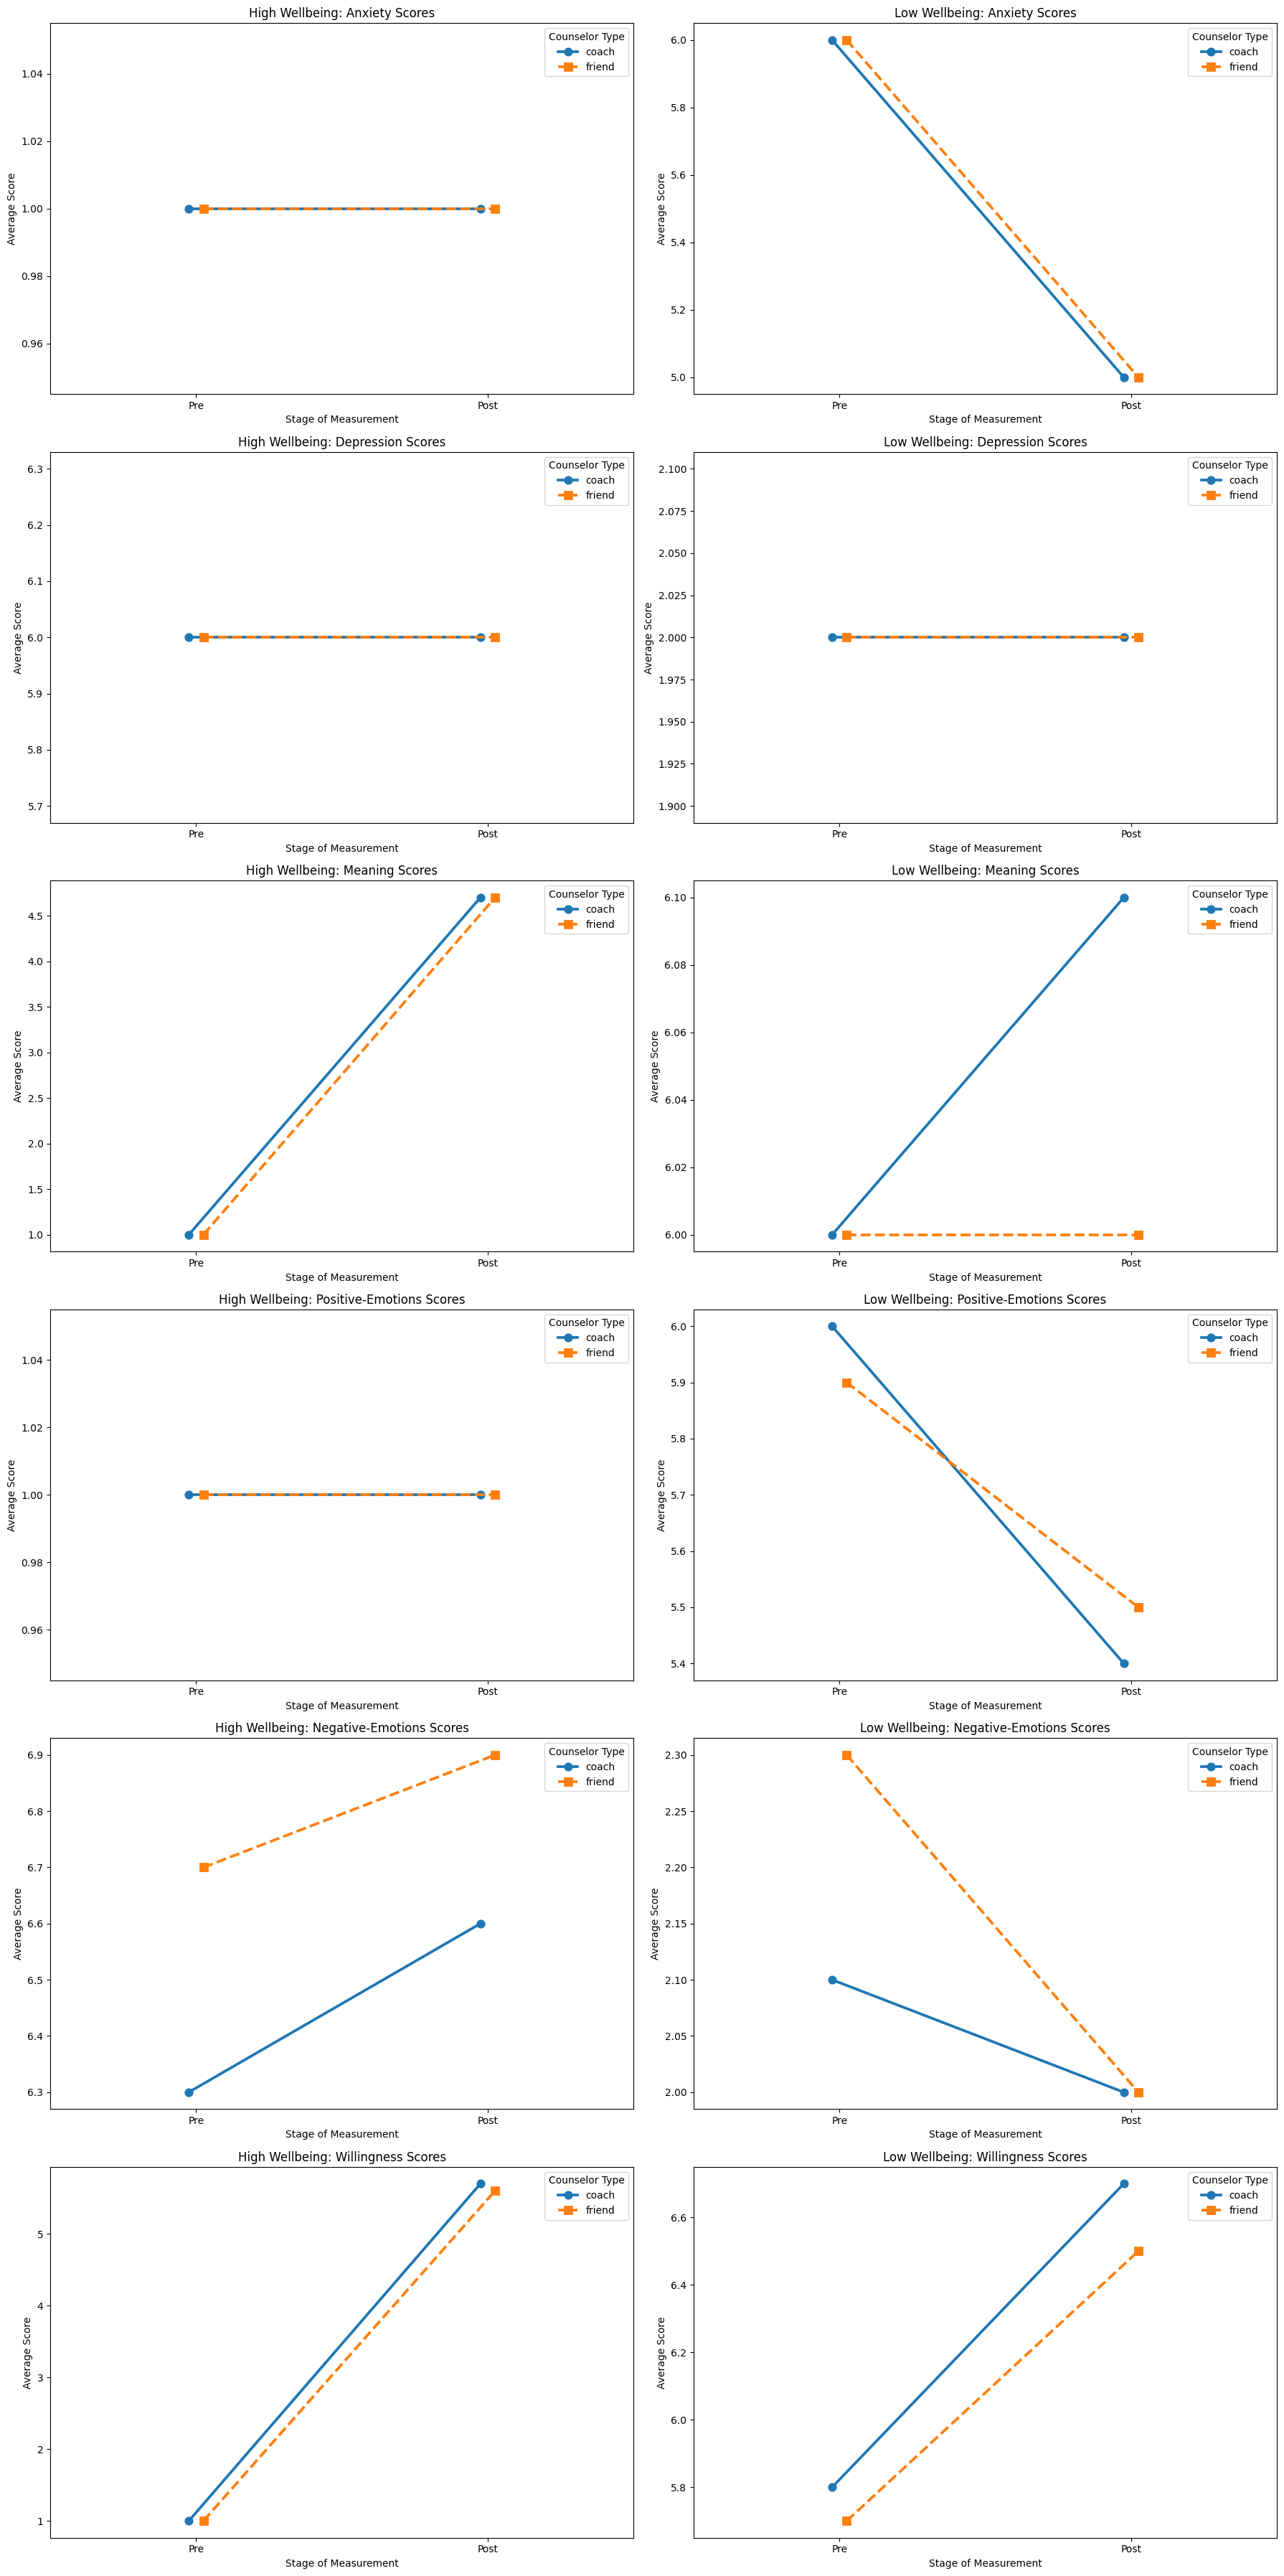

In [ ]:
# Grouping data by 'wellbeing' and 'counselor' and calculating mean and SEM for multiple metrics
metrics = [
    'anxiety', 'depression', 'meaning',
    'positive-emotions', 'negative-emotions', 'willingness'
]

# Constructing dictionary for aggregation
agg_dict = {**{f'pre-{metric}': ['mean', 'sem'] for metric in metrics},
            **{f'post-{metric}': ['mean', 'sem'] for metric in metrics}}

grouped_data = combined_df.groupby(['wellbeing', 'counselor']).agg(agg_dict).reset_index()

# Flattening the multi-level columns for easier access
flat_columns = ['wellbeing', 'counselor'] + [
    f'{prefix}-{metric} {stat}' for metric in metrics for prefix in ['pre', 'post'] for stat in ['Mean', 'SEM']
]
grouped_data.columns = flat_columns

# Set up the figure layout
fig, axes = plt.subplots(nrows=len(metrics), ncols=2, figsize=(18, 6 * len(metrics)))  # Adjust size as needed
axes = axes.flatten()

for i, metric in enumerate(metrics):
    # Preparing data for plotting by creating entries for both pre and post
    plot_data = pd.concat([
        grouped_data[['wellbeing', 'counselor', f'pre-{metric} Mean', f'pre-{metric} SEM']].rename(
            columns={f'pre-{metric} Mean': 'Mean', f'pre-{metric} SEM': 'SEM'}),
        grouped_data[['wellbeing', 'counselor', f'post-{metric} Mean', f'post-{metric} SEM']].rename(
            columns={f'post-{metric} Mean': 'Mean', f'post-{metric} SEM': 'SEM'})
    ], keys=['Pre', 'Post']).reset_index().drop('level_1', axis=1).rename(columns={'level_0': 'Stage'})

    plot_data['Condition'] = plot_data['wellbeing'] + '-' + plot_data['counselor']

    # Filtering data for high and low wellbeing
    plot_data_high = plot_data[plot_data['wellbeing'] == 'high']
    plot_data_low = plot_data[plot_data['wellbeing'] == 'low']

    # Plotting for High Wellbeing
    sns.pointplot(ax=axes[2*i], data=plot_data_high, x='Stage', y='Mean', hue='counselor',
                  markers=['o', 's'], linestyles=['-', '--'],
                  dodge=True, capsize=.1, errwidth=1, errorbar="se")
    axes[2*i].set_title(f'High Wellbeing: {metric.title()} Scores')
    axes[2*i].set_xlabel('Stage of Measurement')
    axes[2*i].set_ylabel('Average Score')
    axes[2*i].legend(title='Counselor Type')

    # Plotting for Low Wellbeing
    sns.pointplot(ax=axes[2*i+1], data=plot_data_low, x='Stage', y='Mean', hue='counselor',
                  markers=['o', 's'], linestyles=['-', '--'],
                  dodge=True, capsize=.1, errwidth=1, errorbar="se")
    axes[2*i+1].set_title(f'Low Wellbeing: {metric.title()} Scores')
    axes[2*i+1].set_xlabel('Stage of Measurement')
    axes[2*i+1].set_ylabel('Average Score')
    axes[2*i+1].legend(title='Counselor Type')

plt.tight_layout()
plt.show()


<ipython-input-7-92079937d2d8>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(ax=axes[i], data=plot_data, x='Condition', y=f'{metric} Mean', hue='Counselor',
<ipython-input-7-92079937d2d8>:25: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.pointplot(ax=axes[i], data=plot_data, x='Condition', y=f'{metric} Mean', hue='Counselor',
<ipython-input-7-92079937d2d8>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(ax=axes[i], data=plot_data, x='Condition', y=f'{metric} Mean', hue='Counselor',
<ipython-input-7-92079937d2d8>:25: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.pointplot(ax=axes[i], data=plot_data, x='Condition', y=f'{metric} Mean', hue='Counselor',


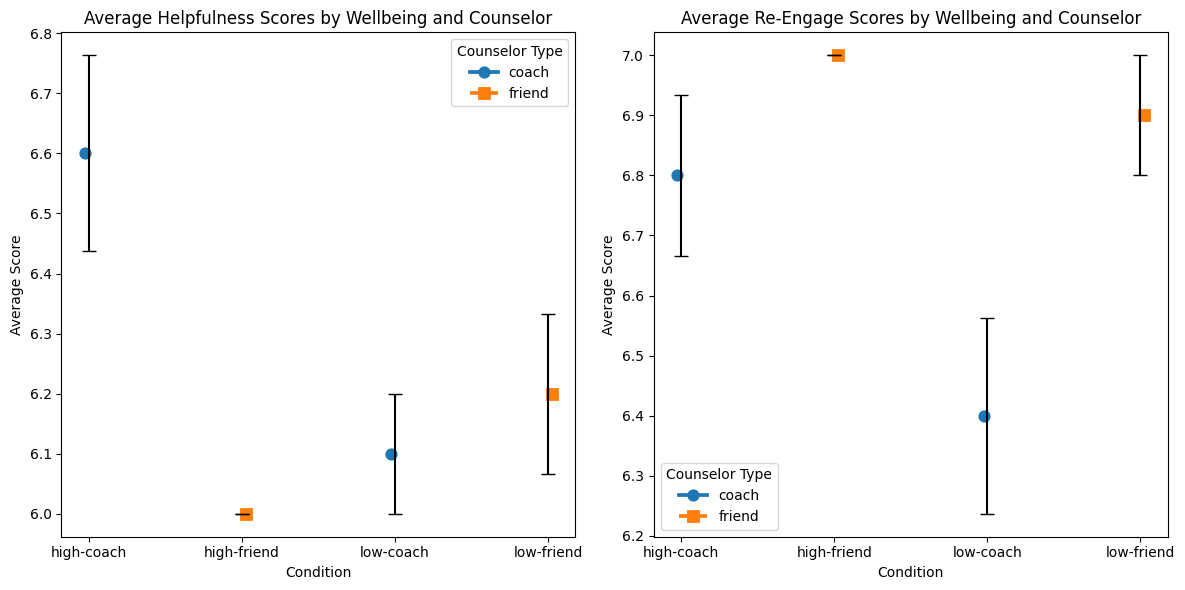

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by 'wellbeing' and 'counselor' to calculate mean and SEM for helpfulness and re-engage
metrics = ['helpfulness', 're-engage']
agg_dict = {metric: ['mean', 'sem'] for metric in metrics}

grouped_data = combined_df.groupby(['wellbeing', 'counselor']).agg(agg_dict).reset_index()

# Flattening the multi-level columns for easier access
grouped_data.columns = ['Wellbeing', 'Counselor'] + [
    f'{metric} {stat}' for metric in metrics for stat in ['Mean', 'SEM']
]

# Set up the figure layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjust size as needed

for i, metric in enumerate(metrics):
    # Preparing data for plotting
    plot_data = grouped_data[['Wellbeing', 'Counselor', f'{metric} Mean', f'{metric} SEM']].copy()
    plot_data['Condition'] = plot_data['Wellbeing'] + '-' + plot_data['Counselor']

    # Plotting
    ax = sns.pointplot(ax=axes[i], data=plot_data, x='Condition', y=f'{metric} Mean', hue='Counselor',
                       markers=['o', 's'], linestyles=['-', '--'],
                       dodge=True, capsize=.1, errwidth=1, ci=None)
    # Manually adding error bars
    for j, row in plot_data.iterrows():
        axes[i].errorbar(x=j, y=row[f'{metric} Mean'], yerr=row[f'{metric} SEM'],
                         fmt='none', capsize=5, color='black')

    axes[i].set_title(f'Average {metric.title()} Scores by Wellbeing and Counselor')
    axes[i].set_xlabel('Condition')
    axes[i].set_ylabel('Average Score')
    axes[i].legend(title='Counselor Type')

plt.tight_layout()
plt.show()


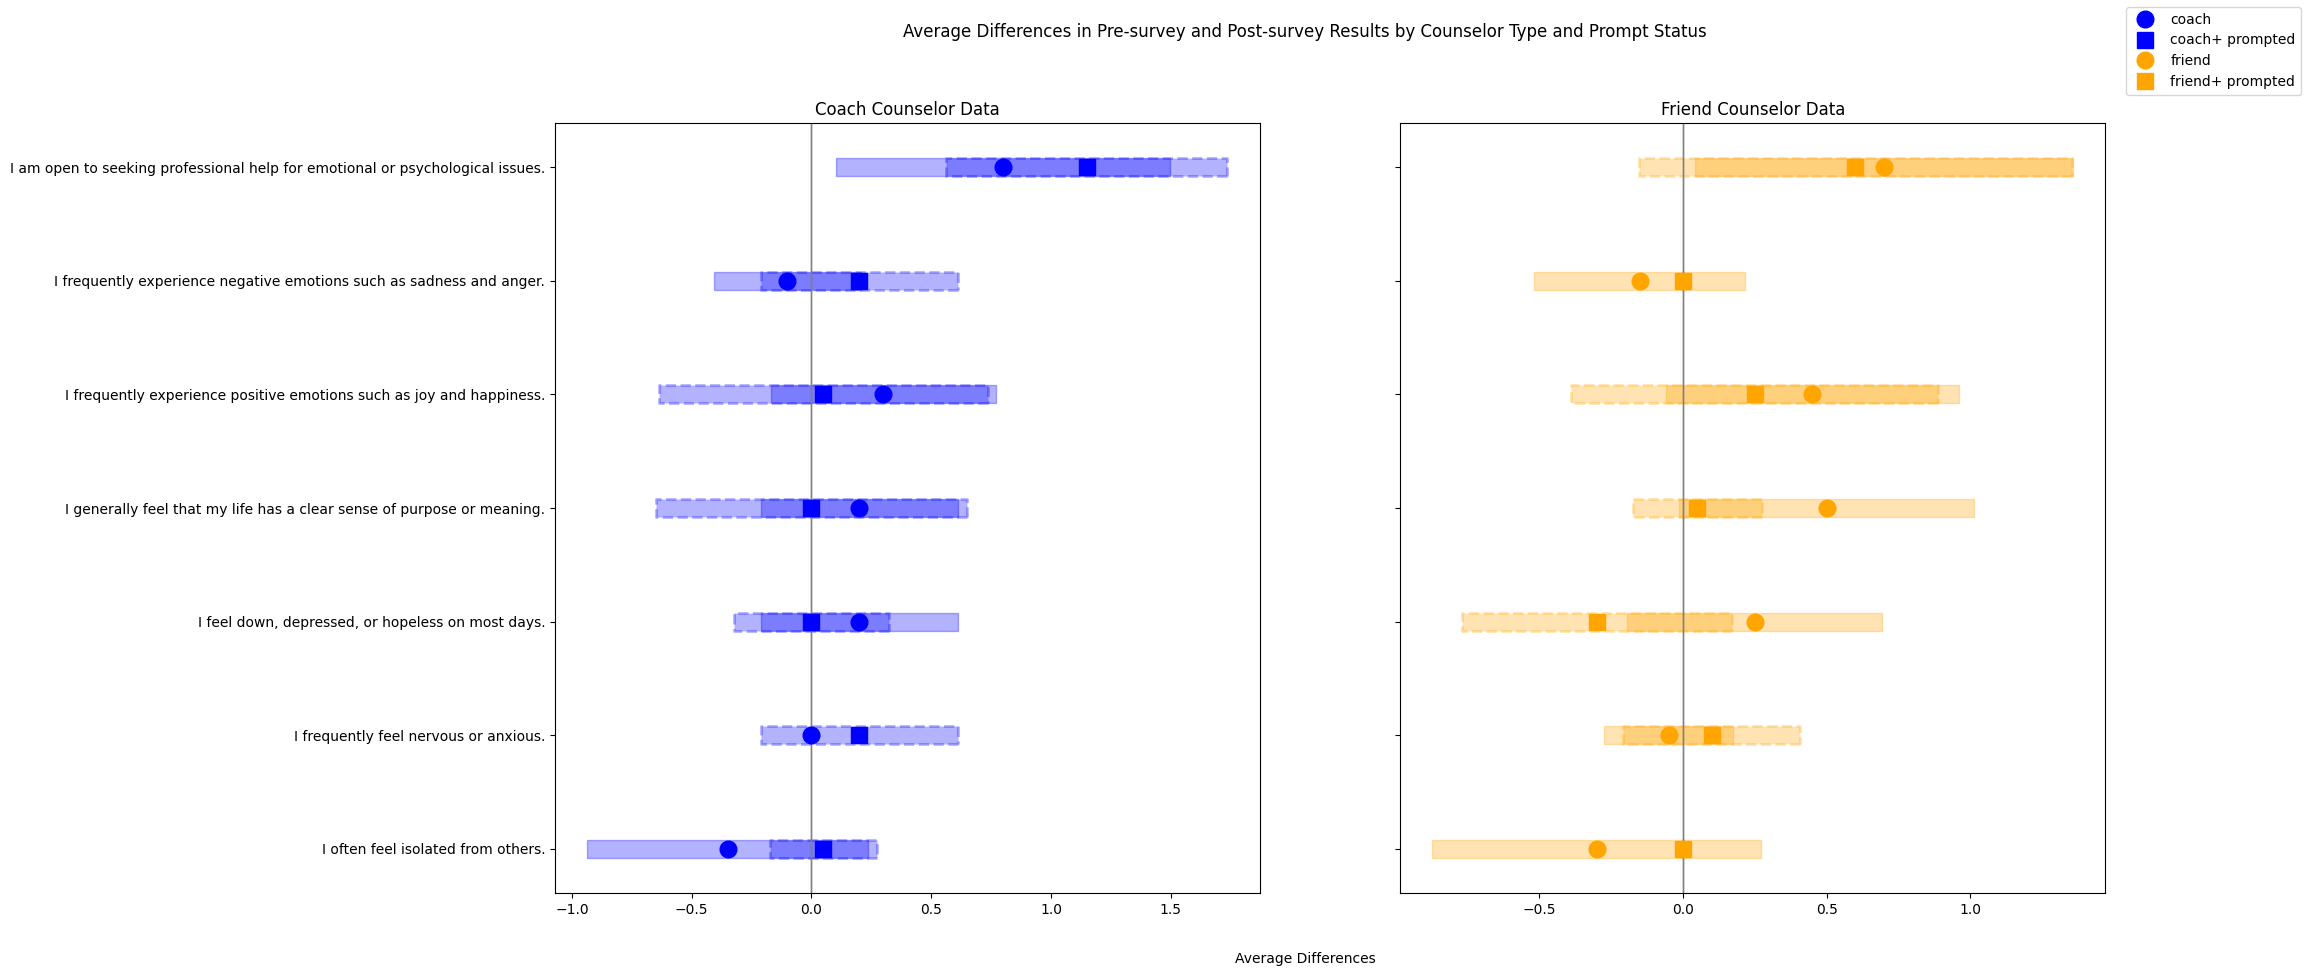

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to determine counselor type
def determine_counselor_type(prompt):
    if "You are a coach" in prompt:
        return 'coach'
    else:
        return 'friend'

# Load data from CSV files
data_simulation = pd.read_csv('/content/sample_data/simulation_results_combined.csv')
data_prompted = pd.read_csv('/content/sample_data/simulation_prompted.csv')

# Classify each session in both datasets
data_simulation['Counselor_Type'] = data_simulation['Counselor_Prompt'].apply(determine_counselor_type)
data_prompted['Counselor_Type'] = data_prompted['Counselor_Prompt'].apply(determine_counselor_type)

# Define the metrics and survey questions
metrics = [
    'loneliness', 'anxiety', 'depression', 'meaning',
    'positive-emotions', 'negative-emotions', 'willingness'
]

survey_questions = [
    "I often feel isolated from others.",
    "I frequently feel nervous or anxious.",
    "I feel down, depressed, or hopeless on most days.",
    "I generally feel that my life has a clear sense of purpose or meaning.",
    "I frequently experience positive emotions such as joy and happiness.",
    "I frequently experience negative emotions such as sadness and anger.",
    "I am open to seeking professional help for emotional or psychological issues."
]

# Initialize subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes = axes.flatten()  # Flatten the array to make indexing easier

# Define colors for clarity
colors = {'coach': 'blue', 'friend': 'orange'}

# Plotting data with clear distinctions
for i, metric in enumerate(metrics):
    for idx, group in enumerate(['coach', 'friend']):
        # Non-prompted
        changes_non_prompted = data_simulation[data_simulation['Counselor_Type'] == group].apply(
            lambda row: row[f'post-{metric}'] - row[f'pre-{metric}'], axis=1)
        avg_change_non_prompted = changes_non_prompted.mean()
        std_dev_non_prompted = changes_non_prompted.std()

        # Prompted
        changes_prompted = data_prompted[data_prompted['Counselor_Type'] == group].apply(
            lambda row: row[f'post-{metric}'] - row[f'pre-{metric}'], axis=1)
        avg_change_prompted = changes_prompted.mean()
        std_dev_prompted = changes_prompted.std()

        # Plot non-prompted and prompted data in their respective subplots
        axes[idx].errorbar(avg_change_non_prompted, i, fmt='o', color=colors[group], markersize=12, label=f'{group}')
        axes[idx].fill_betweenx([i-0.08, i+0.08], avg_change_non_prompted - std_dev_non_prompted, avg_change_non_prompted + std_dev_non_prompted, color=colors[group], alpha=0.3)

        axes[idx].errorbar(avg_change_prompted, i, fmt='s', color=colors[group], markersize=12, label=f'{group}+ prompted')
        axes[idx].fill_betweenx([i-0.08, i+0.08], avg_change_prompted - std_dev_prompted, avg_change_prompted + std_dev_prompted, color=colors[group], alpha=0.3, linestyle='--', linewidth=2)

        # Set subplot titles and labels
        axes[idx].set_yticks(range(len(survey_questions)))
        axes[idx].set_yticklabels(survey_questions if idx == 0 else [])  # Remove y-tick labels for the second subplot
        axes[idx].set_title(f'{group.capitalize()} Counselor Data')
        axes[idx].axvline(0, color='gray', linewidth=0.8)  # Reference line at zero

# Add a common X label, Y label, and plot title
fig.text(0.5, 0.04, 'Average Differences', ha='center')
fig.suptitle('Average Differences in Pre-survey and Post-survey Results by Counselor Type and Prompt Status')

# Handling legends
handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates
handles, labels = [], []
for ax in axes:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:  # Check for duplicates
            handles.append(handle)
            labels.append(label)

# Creating one legend with all unique handles and labels
fig.legend(handles, labels, loc='upper right')

# fig.legend(by_label.values(), by_label.keys(), loc='lower right')

plt.show()


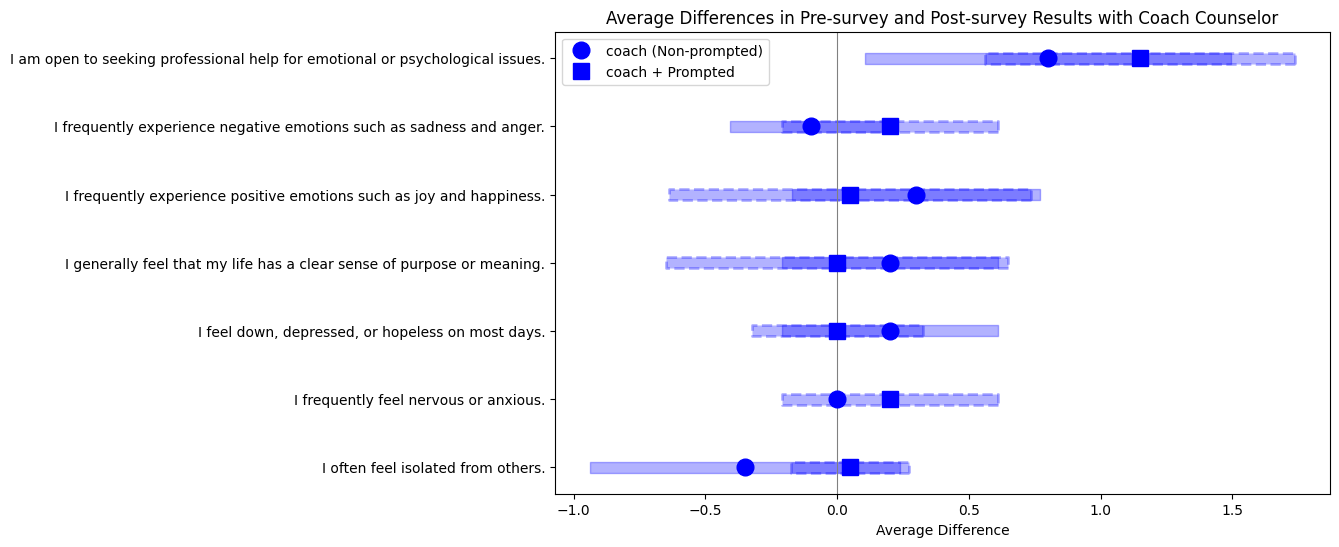

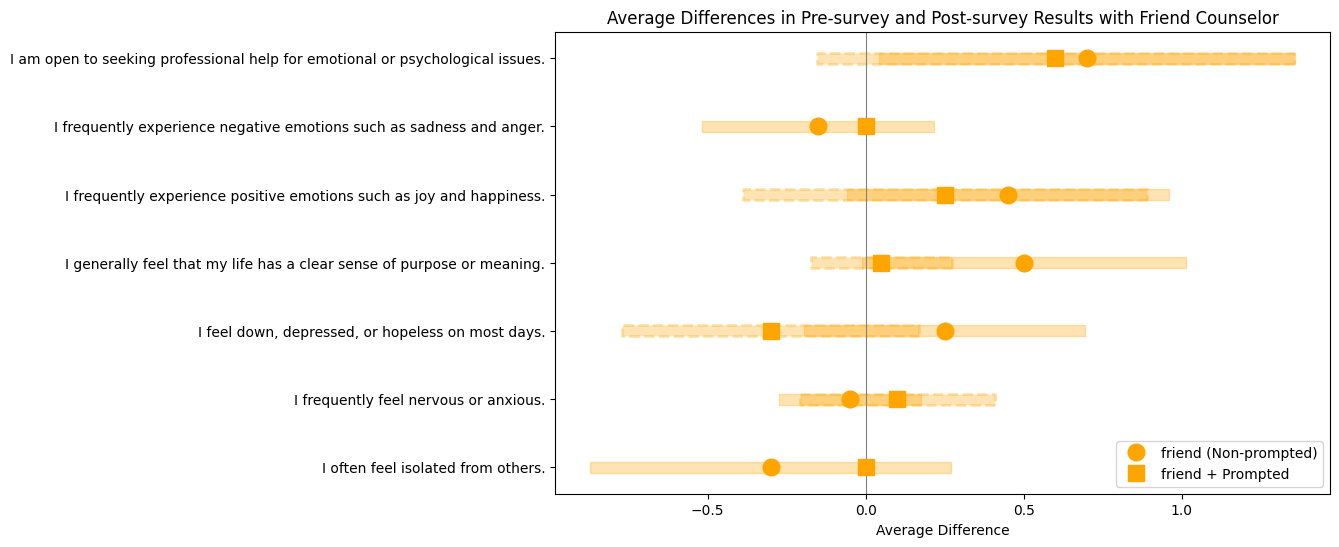

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to determine counselor type
def determine_counselor_type(prompt):
    if "You are a coach" in prompt:
        return 'coach'
    else:
        return 'friend'

# Load data from CSV files
data_simulation = pd.read_csv('/content/sample_data/simulation_results_combined.csv')
data_prompted = pd.read_csv('/content/sample_data/simulation_prompted.csv')

# Classify each session in both datasets
data_simulation['Counselor_Type'] = data_simulation['Counselor_Prompt'].apply(determine_counselor_type)
data_prompted['Counselor_Type'] = data_prompted['Counselor_Prompt'].apply(determine_counselor_type)

# Define the metrics and survey questions
metrics = [
    'loneliness', 'anxiety', 'depression', 'meaning',
    'positive-emotions', 'negative-emotions', 'willingness'
]

survey_questions = [
    "I often feel isolated from others.",
    "I frequently feel nervous or anxious.",
    "I feel down, depressed, or hopeless on most days.",
    "I generally feel that my life has a clear sense of purpose or meaning.",
    "I frequently experience positive emotions such as joy and happiness.",
    "I frequently experience negative emotions such as sadness and anger.",
    "I am open to seeking professional help for emotional or psychological issues."
]

# Define colors for clarity
colors = {'coach': 'blue', 'friend': 'orange'}

# Create separate figures for each counselor type
for group in ['coach', 'friend']:
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, metric in enumerate(metrics):
        # Non-prompted
        changes_non_prompted = data_simulation[data_simulation['Counselor_Type'] == group].apply(
            lambda row: row[f'post-{metric}'] - row[f'pre-{metric}'], axis=1)
        avg_change_non_prompted = changes_non_prompted.mean()
        std_dev_non_prompted = changes_non_prompted.std()

        # Prompted
        changes_prompted = data_prompted[data_prompted['Counselor_Type'] == group].apply(
            lambda row: row[f'post-{metric}'] - row[f'pre-{metric}'], axis=1)
        avg_change_prompted = changes_prompted.mean()
        std_dev_prompted = changes_prompted.std()

        # Plot non-prompted and prompted data
        ax.errorbar(avg_change_non_prompted, i, fmt='o', color=colors[group], markersize=12, label=f'{group} (Non-prompted)' if i == 0 else "")
        ax.fill_betweenx([i-0.08, i+0.08], avg_change_non_prompted - std_dev_non_prompted, avg_change_non_prompted + std_dev_non_prompted, color=colors[group], alpha=0.3)

        ax.errorbar(avg_change_prompted, i, fmt='s', color=colors[group], markersize=12, label=f'{group} + Prompted' if i == 0 else "")
        ax.fill_betweenx([i-0.08, i+0.08], avg_change_prompted - std_dev_prompted, avg_change_prompted + std_dev_prompted, color=colors[group], alpha=0.3, linestyle='--', linewidth=2)

    # Set plot details
    ax.set_yticks(range(len(survey_questions)))
    ax.set_yticklabels(survey_questions)
    ax.set_xlabel('Average Difference')
    ax.set_title(f'Average Differences in Pre-survey and Post-survey Results with {group.capitalize()} Counselor')
    ax.axvline(0, color='gray', linewidth=0.8)  # Reference line at zero
    if group == 'friend':
        ax.legend(loc='lower right')
    else:
        ax.legend()

    # Show plot
    plt.show()